In [153]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
from itertools import product
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import imageio
import os

/tmp/ipykernel_65393/3452475969.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


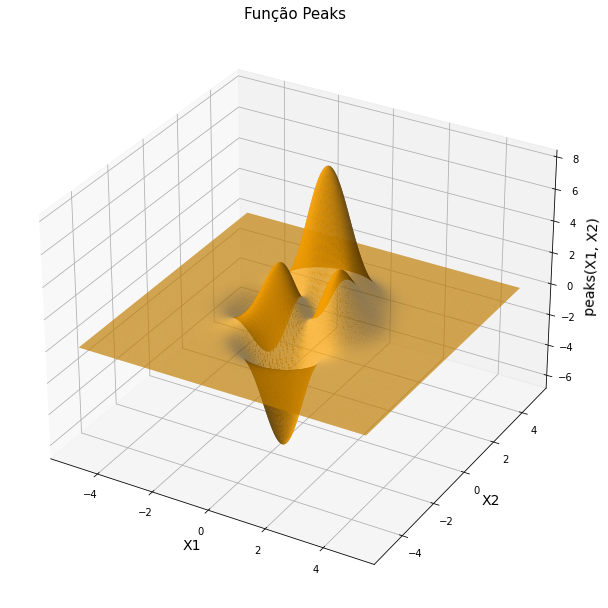

In [147]:
def peaks(x):
    x = x.T
    F = 3*(1-x[0])**2 * np.exp(-(x[0]**2) - (x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5) * np.exp(-x[0]**2-x[1]**2) - 1/3*np.exp(-(x[0]+1)**2 - x[1]**2)
    return F

x = np.linspace(0,10,num=100)
y = np.linspace(0,10,num=100)
[x,y] = np.meshgrid(x,y)


x1 = x2 = np.linspace(-5, 5, 300)
x_p = np.array(list(product(x1,x2)))


font_labels = {'fontsize': 14, 'fontweight': 150}

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.set_title('Função Peaks', fontdict={'fontsize':15})
ax.set_xlabel('X1', fontdict=font_labels)
ax.set_ylabel('X2', fontdict=font_labels)
ax.set_zlabel('peaks(X1, X2)', fontdict=font_labels)
surf = ax.plot_trisurf(x_p[:, 0], x_p[:, 1], [peaks(x_) for x_ in x_p], linewidth=0.1, color='orange')
plt.show()

/tmp/ipykernel_65393/1938636210.py:22: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


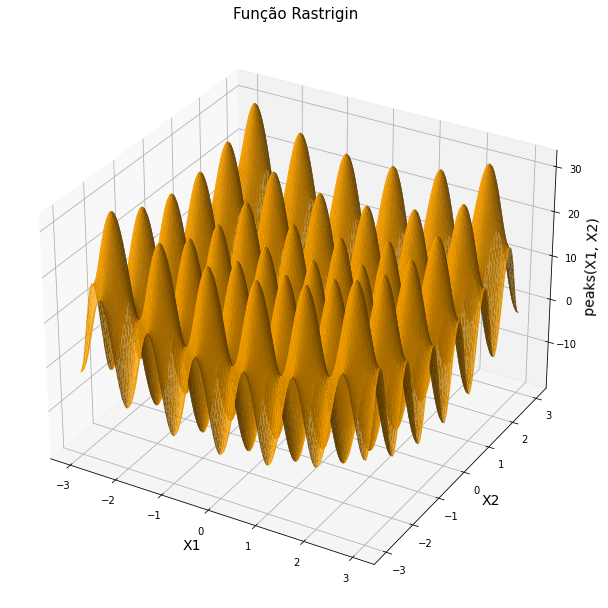

In [148]:
def rastrigin(x):  # objective function
    x = x.reshape(1, -1).T
    Q = np.eye(len(x))
    X = Q.dot(x)

    n = len(X)
    F = 0
    
    for i in range(n):
        F = F + X[i]**2 - 10*np.cos(2*np.pi*X[i])
    
    return F[0]


x1 = x2 = np.linspace(-3, 3, 150)
x_p = np.array(list(product(x1,x2)))


font_labels = {'fontsize': 14, 'fontweight': 150}

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.set_title('Função Rastrigin', fontdict={'fontsize':15})
ax.set_xlabel('X1', fontdict=font_labels)
ax.set_ylabel('X2', fontdict=font_labels)
ax.set_zlabel('peaks(X1, X2)', fontdict=font_labels)
surf = ax.plot_trisurf(x_p[:, 0], x_p[:, 1], [rastrigin(x_) for x_ in x_p], linewidth=0.1, color='orange')
plt.show()

In [180]:
class diferencial:
    
    def __init__(self,N,F,X,C):
        
        self.N = N
        self.F = F
        self.C = C
        self.solutions = np.zeros((2,N))
        self.listFitness = []
        
        for i in range(N):
            self.solutions[0][i] = np.random.uniform(X[0],X[1])
            self.solutions[1][i] = np.random.uniform(X[0],X[1])
            
            
            
    def getBaseSolution(self):
        aux = np.random.randint(0,N)
        return [self.solutions[0:2,aux],aux]
    
    def getDiffSolution(self,posBas):
        
        aux = np.random.randint(0,N)
        while aux == posBas:
            aux = np.random.randint(0,N)
        
        aux1 = np.random.randint(0,N)
        while((aux1 == aux) or (aux1 == posBas)):
            aux1 = np.random.randint(0,N)
        
        result = np.zeros((2))
        result[0] = self.solutions[0][aux] - self.solutions[0][aux1]
        result[1] = self.solutions[1][aux] - self.solutions[1][aux1]
        
        return result
                
    def generateMutateSolution(self):
        aux = np.random.uniform(self.F[0],self.F[1])
                
        aux2, posBas =  self.getBaseSolution() 
        aux3 = aux*self.getDiffSolution(posBas)
        
        mut = aux2 + aux3
        
        return mut
    
    def recombination(self,value2,pos):
        j = np.random.randint(0,N)
        if pos != j:
            return value2
        
        [value, arg] = self.getBaseSolution()
        
        random1 = np.random.randint(0,2)
        random2 = np.random.randint(0,2)
        
        u = np.zeros((2))
        
        u[0] = value[random1]
        u[1] = value[random2]
        
        
        return u
    
    def fitness(self, function, x, u):
        
        result1 = function(x)
        result2 = function(u)
        
        if (result2 < result1):
            return u
        else:
            return x
        
    def getBestFitness(self, function):
        value = 9999999
        solution = self.solutions[0:2,0]
        for j in range(self.N):
            result = function(self.solutions[0:2, j])
            if result < value:
                value = result
                solution = self.solutions[0:2, j]
        
        return [value,solution]
            
        
    
    def diferencial(self,function,loop):
        qtd = 0
        while(True):
            V = np.zeros((2,N))
            best,_ = self.getBestFitness(function)
            self.listFitness.append(best)
            for i in range(self.N):
                mut = self.generateMutateSolution()
                V[0][i] = mut[0]
                V[1][i] = mut[1]
                
            
            for i in range(self.N):
                u = self.recombination(V[0:2,i],i)
                x = self.fitness(function,self.solutions[0:2,i], u)
                
                self.solutions[0:2,i] = x
                
                
            plt.plot(self.solutions[0], self.solutions[1],'o')
            _, best = self.getBestFitness(function)
            plt.plot([0],best[1], 'rv')
            plt.ylim(-6,6)
            plt.xlim(-6,6)
           
      
            plt.title(f'Geracao {qtd}')
                
            filename = f'{qtd}.png'
            filenames.append(filename)
    
            # save frame
            plt.savefig(filename)
            plt.close()    
            
                
    
            if qtd > loop:
                break
                
            qtd = qtd + 1
      
                

In [203]:
N = 50
X =  [-5,5]
F = [0.7, 0.9]
C = [0.6,0.9]
loop = 100
filenames = []

test = diferencial(N,F,X,C)
test.diferencial(peaks, loop)

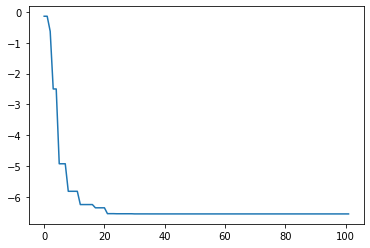

In [204]:
plt.plot(test.listFitness)

In [205]:
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)


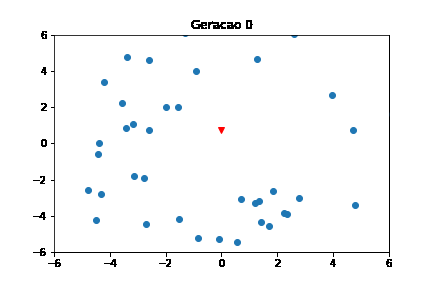

In [206]:
from IPython.display import Image
display(Image(data=open('mygif.gif','rb').read(), format='png'))

In [207]:
test.getBestFitness(peaks)

[-6.551133332835836, array([ 0.22827893, -1.62553496])]

# RASTRIGIN FUNCTION

In [197]:
N = 50
X =  [-5,5]
F = [0.7, 0.9]
C = [0.6,0.9]
loop = 100
filenames = []

test = diferencial(N,F,X,C)
test.diferencial(rastrigin, loop)

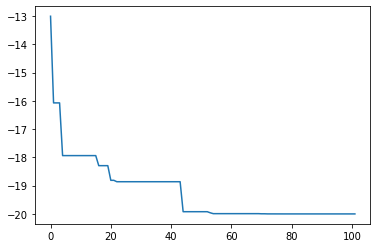

In [198]:
plt.plot(test.listFitness)

In [199]:
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

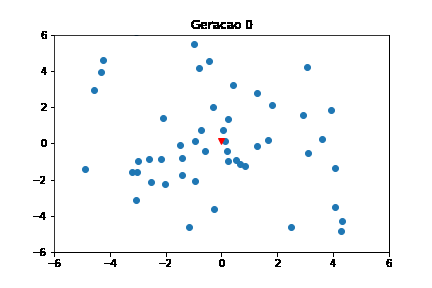

In [200]:
display(Image(data=open('mygif.gif','rb').read(), format='png'))

In [202]:
test.getBestFitness(rastrigin)

[-19.999999993998543, array([-3.31269506e-06, -4.39050561e-06])]